# Regresión Lineal Multivariable

La idea general de la regresión lineal multivariable es permitir al modelo lineal considerar múltiples variables que permitan representar de "mejor" manera el fenómeno estudiado. Usualmente, este modelo se maneja con matrices para facilitar su notación.

La idea principal es modelar los datos de la siguiente manera:
$$h = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +\theta_n x_n$$

Definimos una función de costo
$$J(𝛉) = \frac{1}{2m}\sum_i {(h_i - y_i)}^2$$
que debemos optimizar ya sea derivando e igualando a cero o mediante gradiente descendiente de forma iterativa. Para el caso de gradiente descendiente, se llegó a las siguientes fórmulas:
$$\theta_0 = \theta_0 - \eta \frac{1}{m} \sum_i (h_i - y_i)$$
$$\theta_j = \theta_j - \eta \frac{1}{m} \sum_i (h_i - y_i)x_j$$

Empezamos importando las librerías para el programa.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En esta ocasión, vamos a considerar el siguiente conjunto de datos:
https://www.kaggle.com/datasets/aungpyaeap/fish-market

Para este problema, lo que buscamos es estimar el peso de un pez basado en cinco medidas.

1. Cargamos nuestros datos al sistema. Otra vez, el archivo que contiene el conjunto de datos se encuentra en formato csv. Adicionalmente, mandamos a imprimir las primeras cinco filas para verificar que todo se cargó correctamente.

In [ ]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


2. Para facilitarnos la vida, vamos a agregar una columna que representa el bias ($\theta_0$) al dataframe que alberga los datos.

In [ ]:
df = pd.concat([pd.Series(1, index=df.index, name='bias'), df], axis=1)
df.head()

,bias,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


3. Vamos a elegir las columnas que representan las características ($x_i$):length1, length2, length3, height y width. Además, la variable que se busca predecir es el peso/weight ($y_i$).

In [ ]:
X = df.drop(columns=['Species', 'Weight'])
y = df.iloc[:, 2]

In [ ]:
X.head()

,bias,Length1,Length2,Length3,Height,Width
0,1,23.2,25.4,30.0,11.5200,4.0200
1,1,24.0,26.3,31.2,12.4800,4.3056
2,1,23.9,26.5,31.1,12.3778,4.6961
3,1,26.3,29.0,33.5,12.7300,4.4555
4,1,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

3. **Opcional**: vamos a normalizar los valores. Esto suele acelarar la convergencia del algoritmo de gradiente descendiente. Para hacer esto, vamos a dividir todos los valores de cada columna del dataframe `X` por el valor más alto de cada uno de ellas. Esto hace que los valores se encuentren entre 0 y 1.

In [ ]:
for column in X:
  X[column] = X[column]/np.max(X[column])

X.head()

,bias,Length1,Length2,Length3,Height,Width
0,1.0,0.393220,0.400631,0.441176,0.607691,0.493736
1,1.0,0.406780,0.414826,0.458824,0.658332,0.528814
2,1.0,0.405085,0.417981,0.457353,0.652941,0.576775
3,1.0,0.445763,0.457413,0.492647,0.671520,0.547224
4,1.0,0.449153,0.457413,0.500000,0.656433,0.630558


4. Inicializamos los valores de $\theta_j$ para el algoritmo de gradiente descendiente.

In [ ]:
theta = np.array([0]*len(X.columns))
print(theta)

[0 0 0 0 0 0]


5. Calcular la cardinalidad del conjunto de entrenamiento.

In [ ]:
m = len(df)
print(m)

159


6. Definimos nuestra hipótesis.

In [ ]:
def hipotesis(theta, X):
  return theta*X

7. Definimos la función de costo.

In [ ]:
def funcion_costo(X, y, theta):
  y1 = hipotesis(theta, X)
  y1 = np.sum(y1, axis=1)
  return sum(np.sqrt((y1-y)**2))/(2*m)

8. Implementamos la función que calculamos del gradiente descendiente.

In [ ]:
def gradiente_descendiente(X, y, theta, eta, i):
  J = []  # guarda la funcion de costo en cada iteracion
  k = 0 # variable que controla la iteracion actual
  while k < i:        # abs(j_anteriro - j_nuevo) < delta
    y1 = hipotesis(theta, X)
    y1 = np.sum(y1, axis=1)
    for c in range(0, len(X.columns)):
      theta[c] = theta[c] - eta*(sum((y1-y)*X.iloc[:,c])/len(X))
    j = funcion_costo(X, y, theta) # variable que alberga el valor k de la funcion de costo
    J.append(j)
    k += 1
  return J, j, theta

In [ ]:
def gradiente_descendiente(X, y, theta, eta, i):
  J = []  # guarda la funcion de costo en cada iteracion
  k = 0 # variable que controla la iteracion actual
  y1 = hipotesis(theta, X)
  y1 = np.sum(y1, axis=1)
  for c in range(0, len(X.columns)):
    theta[c] = theta[c] - eta*(sum((y1-y)*X.iloc[:,c])/len(X))
  j = funcion_costo(X, y, theta) # variable que alberga el valor k de la funcion de costo
  J.append(j)
  return J, j, theta

9. Aplicar el gradiente descendiente en la función de costo y obtener los parámetros (convenientemente) optimizados de $𝛉$. En este caso, vamos a considerar un valor de $\eta=0.05$. Este valor puede variar.

In [ ]:
J, j, theta = gradiente_descendiente(X, y, theta, 0.05, 10000)

In [ ]:
print(J)

[177.5379885925611, 159.75621685756022, 145.36323741659368, 134.54112018548233, 127.48426128914508, 122.3299998748105, 118.57514743392305, 115.50835801756925, 113.07242866181528, 111.56464725347075, 110.81914411160784, 110.29481835806887, 110.0138067364332, 109.78509514340101, 109.53696206018414, 109.35288003091682, 109.21346071557873, 109.07404140024056, 108.95838226003289, 108.73894953491948, 108.51951680980608, 108.3507312802614, 108.22399884590583, 108.03759101918155, 107.8599540384486, 107.69511490932248, 107.53232630194171, 107.37491025612157, 107.21749421030142, 107.06007816448127, 106.91297467907603, 106.76739474560154, 106.6346845741413, 106.5022870249144, 106.36988947568751, 106.08969318432224, 105.80949689295696, 105.52930060159171, 105.24910431022644, 104.96890801886113, 104.68871172749584, 104.40851543613061, 104.1283191447653, 103.84812285340008, 103.56792656203481, 103.28773027066954, 103.00753397930421, 102.727337687939, 102.44714139657373, 102.16694510520838, 101.88674

In [ ]:
print(j)

81.50290730661457


In [ ]:
print(theta)

[-59 189 186 179 149 289]


10. Predecir nuevos valores con los valores de $𝛉$ óptimos.

In [ ]:
y_hat = hipotesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

11. Finalmente vamos a graficar el error $J$ en cada paso del gradiente descendiente.

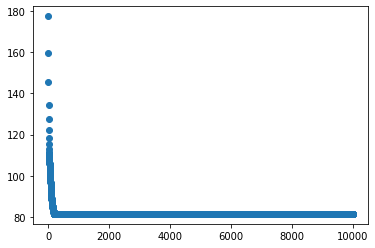

In [ ]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()

**Práctica de laboratorio #1**: Modificar la función del gradiente descendiente para que haga un early stopping. Si el valor no cambia en, digamos, tres nuevas iteraciones, parar el proceso.

**Práctica de laboratorio #2**: Implementar la idea de gradiente descendiente (batch gradiente descent) vista en clase para el problema de regresión lineal simple.
- Primero, limitar el proceso a 100 iteraciones.
- Después, limitar el proceso con la idea del early stopping.

Graficar el error, plz.